In [1]:
%matplotlib inline

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Import train_test_split
import time
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
DATASET_SIZE = 70000
TRAIN_RATIO = 0.7
VALIDATION_RATIO = 0.2
TEST_RATIO = 0.1

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=(1-TRAIN_RATIO))
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=((TEST_RATIO/(VALIDATION_RATIO+TEST_RATIO))))

In [3]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_val = x_val.reshape((x_val.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
y_train = y_train.reshape((y_train.shape[0], -1))
y_val = y_val.reshape((y_val.shape[0], -1))
y_test = y_test.reshape((y_test.shape[0], -1))


In [4]:
print("Training data shape (X):", x_train.shape)
print("Training labels shape (y):", y_train.shape)
print("Test data shape (X):", x_test.shape)
print("Test labels shape (y):", y_test.shape)
print("Validation data shape (X):", x_val.shape)
print("Validation labels shape (y):", y_val.shape)

Training data shape (X): (41999, 3072)
Training labels shape (y): (41999, 1)
Test data shape (X): (6001, 3072)
Test labels shape (y): (6001, 1)
Validation data shape (X): (12000, 3072)
Validation labels shape (y): (12000, 1)


In [5]:
# reshape images to RGB scale with width & height are size 32
x_train = x_train.reshape(x_train.shape[0], 32 * 32 * 3)
x_val = x_val.reshape(x_val.shape[0], 32 * 32 * 3)
x_test = x_test.reshape(x_test.shape[0], 32 * 32 * 3)

# normalization to avoid gradient explode or vanish
x_train = x_train.astype("float32")
x_val = x_val.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255.0
x_test /= 255.0
x_val /= 255.0

# convert class into one hot encoder
y_train = tf.keras.utils.to_categorical(y_train, 10) # np_utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10) #np_utils.to_categorical(y_test, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

In [6]:
class NonlinearClassifier(tf.keras.models.Model):

    def __init__(self, activation=tf.nn.tanh):
        tf.keras.models.Model.__init__(self)

        self.layer_1 = tf.keras.layers.Dense(64, activation='relu')
        self.drop_2 = tf.keras.layers.Dropout(0.2)
        self.layer_2 = tf.keras.layers.Dense(64, activation='relu')
        self.drop_3 = tf.keras.layers.Dropout(0.2)
        self.layer_3 = tf.keras.layers.Dense(64, activation='relu')
        self.drop_4 = tf.keras.layers.Dropout(0.2)
        self.layer_4 = tf.keras.layers.Dense(64, activation='relu')
        self.drop_5 = tf.keras.layers.Dropout(0.2)

        # The last layer needs to be like this:
        self.layer_out = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, inputs):

        x = tf.keras.layers.Flatten()(inputs)
        x = self.layer_1(x)
        x = self.drop_2(x)
        # The more complex version:
        x = self.layer_2(x)
     #   x = self.drop_3(x)
        x = self.layer_3(x)
        x = self.drop_4(x)
        x = self.layer_4(x)
        x = self.drop_5(x)


        x = self.layer_out(x)

        return x

In [7]:
nonlinear_model = NonlinearClassifier()
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001)
# Compile the model using the configured optimizer
nonlinear_model.compile(optimizer=optimizer)
nonlinear_model.compile(loss="categorical_crossentropy",
                        optimizer=optimizer,
                        metrics=['accuracy'])
nonlinear_model.summary()

Model: "nonlinear_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
%%time

epochs = 30
batch_size = 256

history = nonlinear_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(x_val, y_val))

Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'nonlinear_classifier', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


165/165 - 1s - 7ms/step - accuracy: 0.2858 - loss: 1.9582 - val_accuracy: 0.3347 - val_loss: 1.8389
Epoch 2/30
165/165 - 0s - 3ms/step - accuracy: 0.3682 - loss: 1.7609 - val_accuracy: 0.3781 - val_loss: 1.7331
Epoch 3/30
165/165 - 0s - 3ms/step - accuracy: 0.3997 - loss: 1.6794 - val_accuracy: 0.3412 - val_loss: 1.8268
Epoch 4/30
165/165 - 0s - 3ms/step - accuracy: 0.4139 - loss: 1.6465 - val_accuracy: 0.3982 - val_loss: 1.6761
Epoch 5/30
165/165 - 0s - 3ms/step - accuracy: 0.4301 - loss: 1.5936 - val_accuracy: 0.3663 - val_loss: 1.7826
Epoch 6/30
165/165 - 0s - 3ms/step - accuracy: 0.4425 - loss: 1.5688 - val_accuracy: 0.4218 - val_loss: 1.6165
Epoch 7/30
165/165 - 0s - 3ms/step - accuracy: 0.4517 - loss: 1.5384 - val_accuracy: 0.4039 - val_loss: 1.6984
Epoch 8/30
165/165 - 0s - 3ms/step - accuracy: 0.4570 - loss: 1.5230 - val_accuracy: 0.3965 - val_loss: 1.6958
Epoch 9/30
165/165 - 0s - 3ms/step - accuracy: 0.4689 - loss: 1.4952 - val_accuracy: 0.4383 - val_loss: 1.5821
Epoch 10/30


In [9]:
%%time

epochs = 30
batch_size = 300

history = nonlinear_model.fit(x_val, y_val, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_val, y_val))

Epoch 1/30
40/40 - 0s - 5ms/step - accuracy: 0.4814 - loss: 1.4759 - val_accuracy: 0.4960 - val_loss: 1.4227
Epoch 2/30
40/40 - 0s - 4ms/step - accuracy: 0.4917 - loss: 1.4277 - val_accuracy: 0.5058 - val_loss: 1.3888
Epoch 3/30
40/40 - 0s - 5ms/step - accuracy: 0.5009 - loss: 1.4065 - val_accuracy: 0.4981 - val_loss: 1.3963
Epoch 4/30
40/40 - 0s - 4ms/step - accuracy: 0.5077 - loss: 1.3878 - val_accuracy: 0.5135 - val_loss: 1.3698
Epoch 5/30
40/40 - 0s - 4ms/step - accuracy: 0.5132 - loss: 1.3744 - val_accuracy: 0.5145 - val_loss: 1.3527
Epoch 6/30
40/40 - 0s - 4ms/step - accuracy: 0.5165 - loss: 1.3569 - val_accuracy: 0.5244 - val_loss: 1.3363
Epoch 7/30
40/40 - 0s - 4ms/step - accuracy: 0.5204 - loss: 1.3404 - val_accuracy: 0.5265 - val_loss: 1.3186
Epoch 8/30
40/40 - 0s - 4ms/step - accuracy: 0.5204 - loss: 1.3388 - val_accuracy: 0.5320 - val_loss: 1.3057
Epoch 9/30
40/40 - 0s - 4ms/step - accuracy: 0.5171 - loss: 1.3412 - val_accuracy: 0.5173 - val_loss: 1.3405
Epoch 10/30
40/40 -

In [10]:
%%time

epochs = 30
batch_size = 300

history = nonlinear_model.fit(x_test, y_test, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_val, y_val))

Epoch 1/30
21/21 - 0s - 7ms/step - accuracy: 0.4726 - loss: 1.5300 - val_accuracy: 0.5665 - val_loss: 1.2034
Epoch 2/30
21/21 - 0s - 5ms/step - accuracy: 0.4751 - loss: 1.4834 - val_accuracy: 0.5543 - val_loss: 1.2387
Epoch 3/30
21/21 - 0s - 5ms/step - accuracy: 0.4878 - loss: 1.4674 - val_accuracy: 0.4310 - val_loss: 1.5826
Epoch 4/30
21/21 - 0s - 5ms/step - accuracy: 0.3671 - loss: 1.8303 - val_accuracy: 0.3478 - val_loss: 1.8784
Epoch 5/30
21/21 - 0s - 5ms/step - accuracy: 0.2885 - loss: 2.0424 - val_accuracy: 0.3403 - val_loss: 1.7920
Epoch 6/30
21/21 - 0s - 5ms/step - accuracy: 0.3529 - loss: 1.7871 - val_accuracy: 0.3480 - val_loss: 1.8793
Epoch 7/30
21/21 - 0s - 5ms/step - accuracy: 0.2795 - loss: 2.0715 - val_accuracy: 0.2915 - val_loss: 1.8899
Epoch 8/30
21/21 - 0s - 5ms/step - accuracy: 0.3306 - loss: 1.8283 - val_accuracy: 0.3467 - val_loss: 1.7768
Epoch 9/30
21/21 - 0s - 5ms/step - accuracy: 0.3704 - loss: 1.7816 - val_accuracy: 0.3882 - val_loss: 1.6898
Epoch 10/30
21/21 -

In [11]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

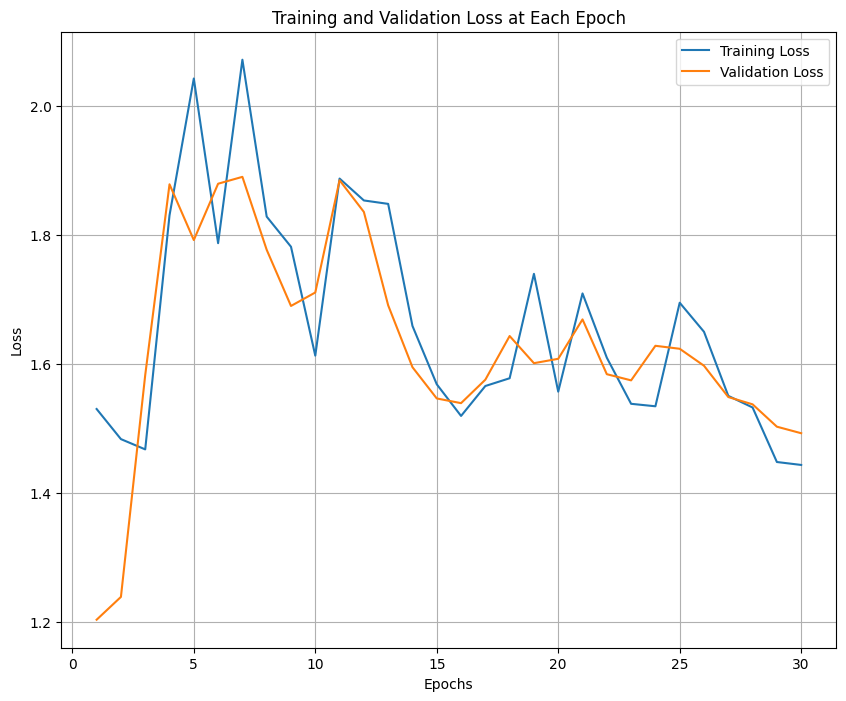

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, epochs + 1), training_loss, label='Training Loss')
plt.plot(range(1, epochs + 1), validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss at Each Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
nonlinscores = nonlinear_model.evaluate(x_train, y_train, verbose=2)
print("%s: %.2f%%" % (nonlinear_model.metrics_names[1], nonlinscores[1]*100))

nonlinscores = nonlinear_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (nonlinear_model.metrics_names[1], nonlinscores[1]*100))

nonlinscores = nonlinear_model.evaluate(x_val, y_val, verbose=2)
print("%s: %.2f%%" % (nonlinear_model.metrics_names[1], nonlinscores[1]*100))

1313/1313 - 0s - 332us/step - accuracy: 0.4604 - loss: 1.5224
compile_metrics: 46.04%
188/188 - 0s - 360us/step - accuracy: 0.4999 - loss: 1.3906
compile_metrics: 49.99%
375/375 - 0s - 339us/step - accuracy: 0.4692 - loss: 1.4925
compile_metrics: 46.92%


In [14]:
 # def show_failures(predictions, trueclass=None, predictedclass=None, maxtoshow=10):
#     rounded = np.argmax(predictions, axis=1)
#     errors = rounded!=y_true
#     print('Showing max', maxtoshow, 'first failures. '
#           'The predicted class is shown first and the correct class in parenthesis.')
#     ii = 0
#     plt.figure(figsize=(maxtoshow, 1))
#     for i in range(x_test.shape[0]):
#         if ii>=maxtoshow:
#             break
#         if errors[i]:
#             if trueclass is not None and y_test[i] != trueclass:
#                 continue
#             if predictedclass is not None and rounded[i] != predictedclass:
#                 continue
#             plt.subplot(1, maxtoshow, ii+1)
#             plt.axis('off')
#             plt.imshow(x_test[i,:,:], cmap="gray")
#             plt.title("%d (%d)" % (rounded[i], y_test[i]))
#             ii = ii + 1

In [15]:
def show_failures(predictions, trueclass=None, predictedclass=None, maxtoshow=10, y_true=None): # Added y_true parameter
    rounded = np.argmax(predictions, axis=1)
    errors = rounded!=y_true # Use the y_true passed to the function
    print('Showing max', maxtoshow, 'first failures. '
          'The predicted class is shown first and the correct class in parenthesis.')
    ii = 0
    plt.figure(figsize=(maxtoshow, 1))
    for i in range(x_test.shape[0]):
        if ii>=maxtoshow:
            break
        if errors[i]:
            if trueclass is not None and y_test[i] != trueclass:
                continue
            if predictedclass is not None and rounded[i] != predictedclass:
                continue
            plt.subplot(1, maxtoshow, ii+1)
            plt.axis('off')
            plt.imshow(x_test[i,:,:], cmap="gray")
            plt.title("%d (%d)" % (rounded[i], y_test[i]))
            ii = ii + 1

In [16]:
nonlinpredictions = nonlinear_model.predict(x_test)

show_failures(nonlinpredictions, y_true=y_test) # Pass y_test to the function

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


ValueError: operands could not be broadcast together with shapes (6001,) (6001,10) 

In [ ]:
nonlinpredictions = nonlinear_model.predict(x_train)

show_failures(nonlinpredictions, y_true=y_train) # Pass y_train to the function